## Coding Challenge - Maren Leuthner

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### (1) The location of the weather station is contained within the file. Compute the air distance to the Bosch plant located at (48.49524, 9.13782) using a suitable formula.

In [2]:
# import necessary math and geopy packages/modules
from math import sin, cos, sqrt, atan2, radians
import geopy.distance

In [3]:
# read text file into pandas DataFrame
df_geo = pd.read_table('Metadaten_Geographie_03278.txt', delimiter=';')
df_geo.head()

,Stations_id,Stationshoehe,Geogr.Breite,Geogr.Laenge,von_datum,bis_datum,Stationsname
0,3278,350.0,48.5348,9.2889,19240620,19900331,Metzingen
1,3278,362.0,48.5318,9.2789,19900401,20021231,Metzingen
2,3278,370.0,48.5301,9.3161,20030101,20080610,Metzingen
3,3278,354.0,48.5377,9.2734,20081202,,Metzingen


In [4]:
# variables with long/lat coordinates of Bosch plant (given in questions) and weather station (contained in df above)
bosch_coords = (48.49524, 9.13782)
# using the latest "Geogr.Breite/.Laenge" vom df.loc[[3]]
station_coords = (48.5377,  9.2734)
# For comparison purposes of result with a suitable formula, the calculation of a geopy package function is used as reference
comp_airdistance = geopy.distance.distance(bosch_coords, station_coords).km
print(f"Distance between Bosch plant and weather station: {geopy.distance.distance(bosch_coords, station_coords).km} km.")

Distance between Bosch plant and weather station: 11.073371450430095 km.


In [5]:
# approximate radius of earth in km
R = 6373.0

# using radians function from math module
Bosch_lat = radians(48.49524)
Bosch_lon = radians(9.13782)
Wstation_lat = radians(48.5377)
Wstation_lon = radians(9.2734)

# compute longitude and latitude distance between Bosch plant and weather station
distance_lon = Wstation_lon - Bosch_lon
distance_lat = Wstation_lat - Bosch_lat

# use of formula found on stackoverflow
# source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
a = sin(distance_lat / 2)**2 + cos(Bosch_lat) * cos(Wstation_lat) * sin(distance_lon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
distance = R * c

# Compare computed distance of formula and computed distance with geopy
print(f"Distance between Bosch plant and weather station: {distance:.2f} km")
print(f"Computed distance with geopy is: {comp_airdistance:.02f} km")


Distance between Bosch plant and weather station: 11.05 km
Computed distance with geopy is: 11.07 km


Now read the file ``produkt_tu_stunde_20090401_20211231_03278.txt`` contained in the archive with Python and answer the following questions. The available columns are:
* ``STATIONS_ID``: not relevant
* ``MESS_DATUM``: date and time of measurement
* ``QN_9``: not relevant
* ``TT_TU`` air temperature in °C
* ``RF_TU`` relative humidity in %
* ````: not relevant

Missing values in ``TT_TU`` and ``RF_TU`` are encoded as ``-999``.

#### (2) Describe the general properties of the dataset. This could be, among others:
* number of samples, missing values, ...
* measures of central tendency
* measures of variability (or spread)
* correlation measures

... that make sense in the given context.

In [6]:
# read text file into pandas DataFrame
df = pd.read_table('produkt_tu_stunde_20090401_20211231_03278.txt', delimiter=';')

In [7]:
# get columns
df.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_9', 'TT_TU', 'RF_TU', 'eor'], dtype='object')

In [8]:
# deleting irrelevant columns
df = df.drop(columns=['STATIONS_ID', 'QN_9', 'eor'])
df.head()

,MESS_DATUM,TT_TU,RF_TU
0,2009040100,4.3,81.0
1,2009040101,3.2,84.0
2,2009040102,2.2,88.0
3,2009040103,1.6,89.0
4,2009040104,1.2,92.0


In [9]:
# the dataset has 111 792 rows and 3 columns
print(df.shape)
# display 111 792 rows and 3 columns with type float and integer
print(df.info())

(111792, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111792 entries, 0 to 111791
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   MESS_DATUM  111792 non-null  int64  
 1   TT_TU       111792 non-null  float64
 2   RF_TU       111792 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.6 MB
None


In [10]:
# insights on central tendency of the quantitative data
print(f"Mean {df.mean()}, Median {df.median()}")
# to compute mode doesn't make sense in this context since there are no categorical variables

Mean MESS_DATUM    2.015184e+09
TT_TU         1.031012e+01
RF_TU         7.363792e+01
dtype: float64, Median MESS_DATUM    2.015082e+09
TT_TU         1.070000e+01
RF_TU         7.900000e+01
dtype: float64


In [11]:
# dropping missing values that are encoded as -999
df_new = df[(df.TT_TU != -999) & (df.RF_TU != -999)]
# get an overview of the distribution of the temperature data (Standard Deviation, Interquartile range)
df_new[['TT_TU', 'RF_TU']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TT_TU,111712.0,10.860865,8.204760,-18.4,4.6,10.7,16.7,37.1
RF_TU,111712.0,74.406062,18.841315,11.0,62.0,79.0,90.0,100.0


In [12]:
# compute variance of df
print(df_new.var())

MESS_DATUM    1.355412e+13
TT_TU         6.731808e+01
RF_TU         3.549952e+02
dtype: float64


In [13]:
# time range of dataset from 01-04-2009 to 23-12-2021
print(f'The time range of this dataset is {df_new.MESS_DATUM.min(), df_new.MESS_DATUM.max()}')

The time range of this dataset is (2009040100, 2021123123)


In [14]:
# performing datetime conversions on column 'MESS_DATUM' for better readability
dates = pd.to_datetime(df_new['MESS_DATUM'], format='%Y%m%d%H')
df_new['year'] = dates.dt.year
df_new['month'] = dates.dt.month
df_new['day'] = dates.dt.day
df_new['date'] = dates.dt.to_period('M').dt.strftime('%Y-%m')
print(df_new.head())

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

   MESS_DATUM  TT_TU  RF_TU  year  month  day     date
0  2009040100    4.3   81.0  2009      4    1  2009-04
1  2009040101    3.2   84.0  2009      4    1  2009-04
2  2009040102    2.2   88.0  2009      4    1  2009-04
3  2009040103    1.6   89.0  2009      4    1  2009-04
4  2009040104    1.2   92.0  2009      4    1  2009-04


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# time range of dataset
print(f'The time range of this dataset is {df_new.date.min(), df_new.date.max()}')

The time range of this dataset is ('2009-04', '2021-12')


In [16]:
# check correlation among columns
correlations = df_new.corr()
print(correlations)

            MESS_DATUM     TT_TU     RF_TU      year     month       day
MESS_DATUM    1.000000  0.009841 -0.040361  0.999957 -0.033148  0.000206
TT_TU         0.009841  1.000000 -0.569439  0.008518  0.141750  0.006813
RF_TU        -0.040361 -0.569439  1.000000 -0.041809  0.157762 -0.015756
year          0.999957  0.008518 -0.041809  1.000000 -0.042430 -0.000124
month        -0.033148  0.141750  0.157762 -0.042430  1.000000  0.009789
day           0.000206  0.006813 -0.015756 -0.000124  0.009789  1.000000


In [17]:
print(correlations['MESS_DATUM'])

MESS_DATUM    1.000000
TT_TU         0.009841
RF_TU        -0.040361
year          0.999957
month        -0.033148
day           0.000206
Name: MESS_DATUM, dtype: float64


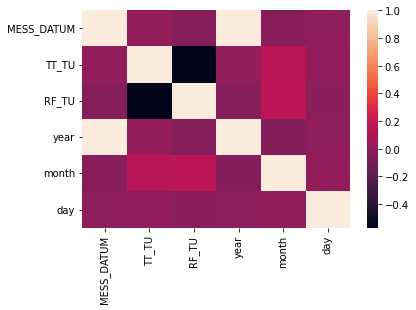

In [18]:
# visually display correlations in heatmap using seaborn
%matplotlib inline
sns.heatmap(correlations)
plt.show()

#### (3) Compute the minimum, maximum and average temperature in January 2017.
Collecting the temperature of January 2017 and computing the min, max and mean temperature of the month.

In [19]:
# create dataframe for January 2017 to compute minimum, maximum and average temperature
df_temp = df_new[(df_new.date == '2017-01')]
print(f"Minimum temperature: {df_temp['TT_TU'].min()}, maximum temperature: {df_temp['TT_TU'].max()} and average temperature: {df_temp['TT_TU'].mean()}")

Minimum temperature: -15.2, maximum temperature: 8.8 and average temperature: -2.64032258064516


#### (4) Assess the temperature development in the data. 
Can you find signs of climate change? Perform aggregations, visualizations to show your findings.

<AxesSubplot:xlabel='year', ylabel='TT_TU'>

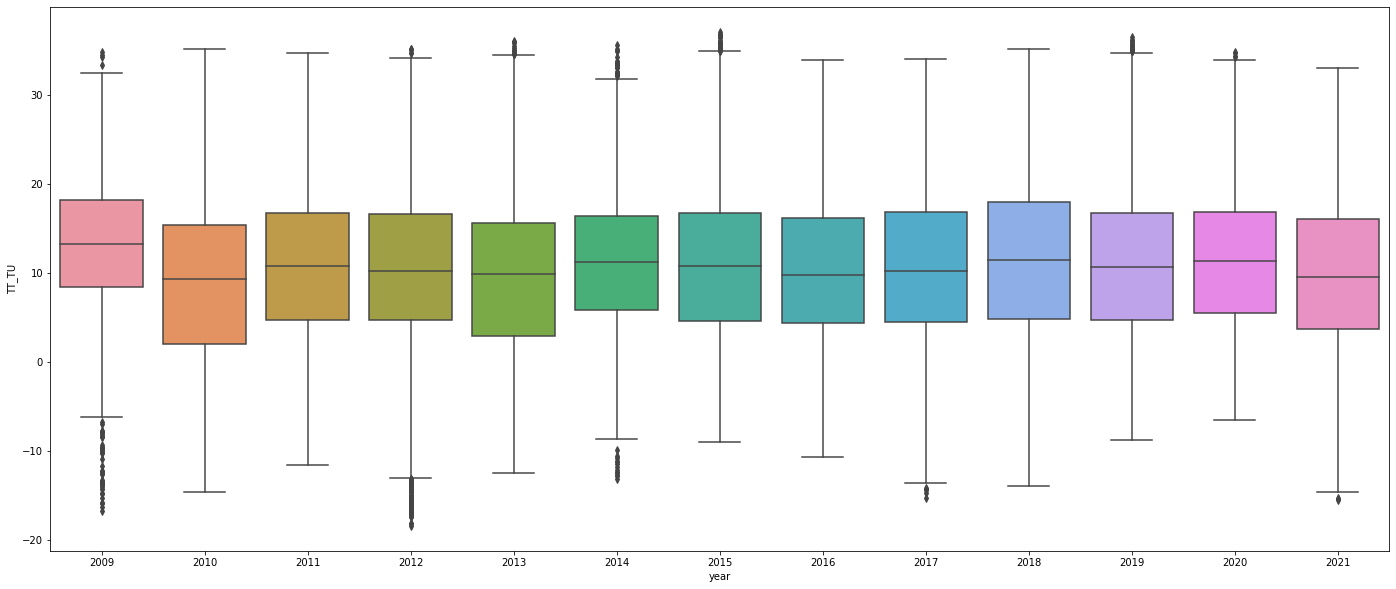

In [20]:
# Boxplot of yearly air temperature
fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(x = df_new['year'], 
                y = df_new['TT_TU'], 
                ax = ax)

<AxesSubplot:xlabel='year', ylabel='RF_TU'>

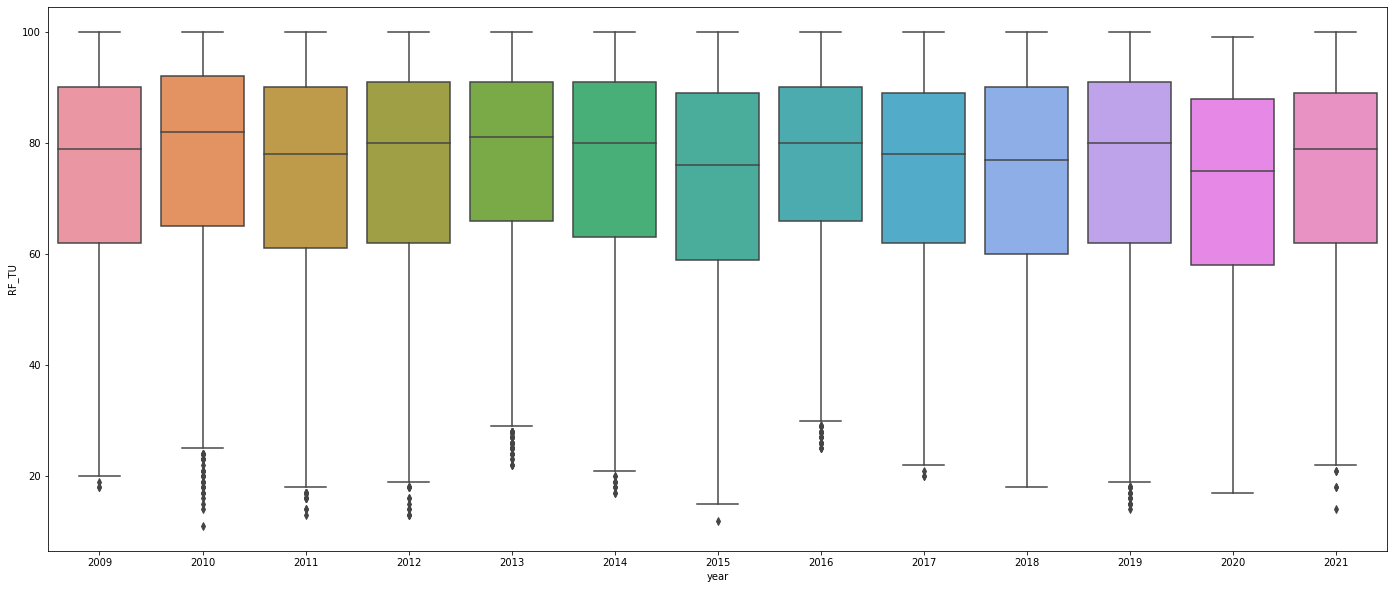

In [21]:
# Boxplot of yearly relative humiditiy in % 
fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(x = df_new['year'], 
                y = df_new['RF_TU'], 
                ax = ax)

<AxesSubplot:xlabel='year', ylabel='TT_TU'>

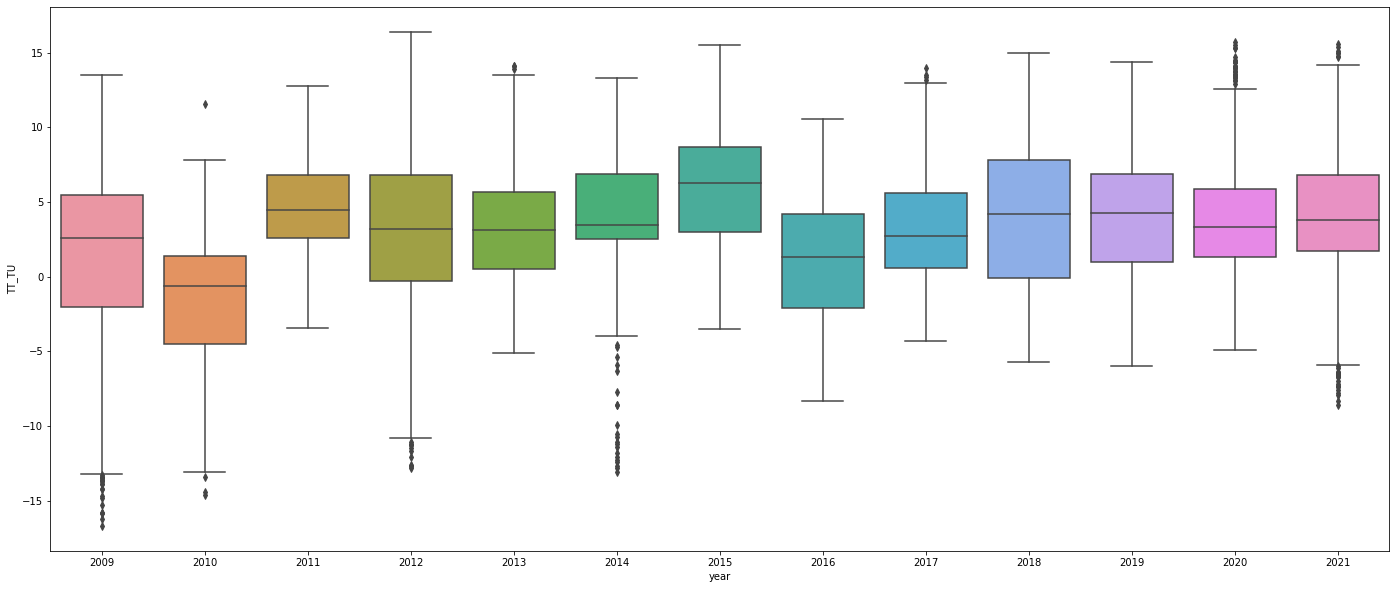

In [22]:
# Boxplot of yearly air temperature in December
dfDecember = df_new[(df_new.month == 12)]
fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(x = dfDecember['year'], 
                y = dfDecember['TT_TU'], 
                ax = ax)

<AxesSubplot:xlabel='year', ylabel='RF_TU'>

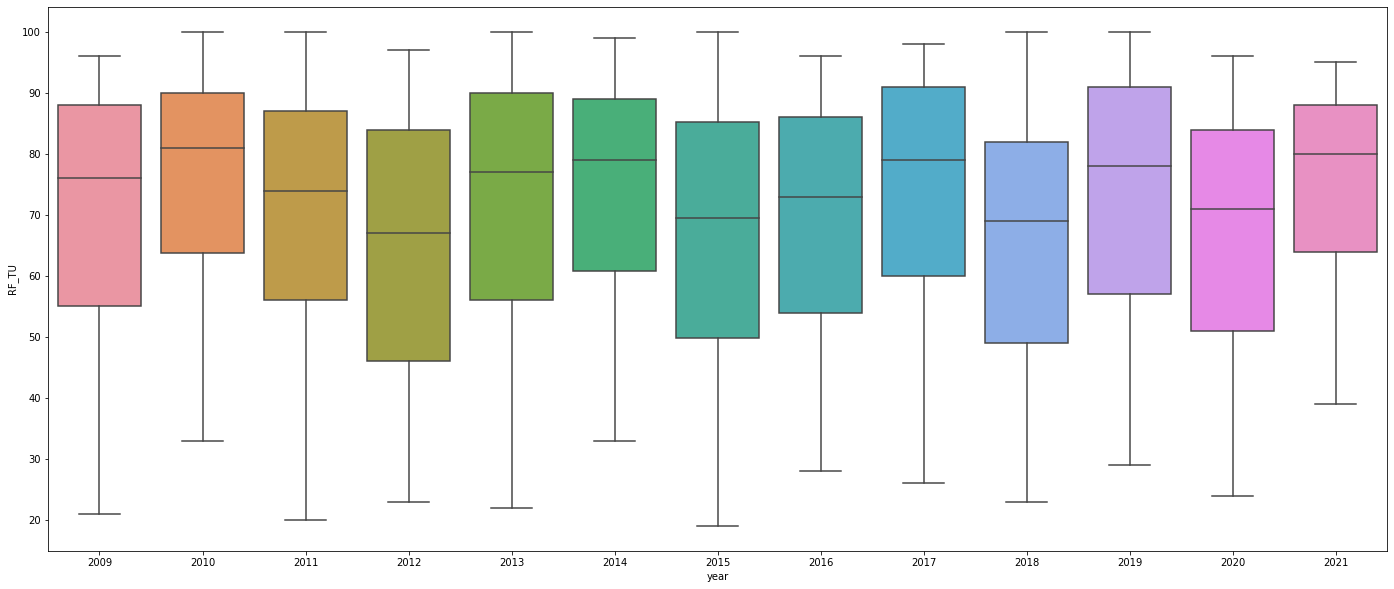

In [23]:
# aggregating the average of relative humidity in % in August per year between 2009-2021
dfAugust = df_new[(df_new.month == 8)]
fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(x = dfAugust['year'], 
                y = dfAugust['RF_TU'], 
                ax = ax)

In [24]:
# aggregating the average temperature per month and year between '2009-04' and '2021-12'
df_avgTemp= df_new.groupby(['year','month'])['TT_TU'].agg('mean').reset_index()
df_avgTemp

,year,month,TT_TU
0,2009,4,12.335833
1,2009,5,15.631452
2,2009,6,16.669167
3,2009,7,19.129032
4,2009,8,19.740054
...,...,...,...
148,2021,8,17.581048
149,2021,9,16.135139
150,2021,10,9.899059
151,2021,11,3.857222


In [25]:
# aggregating the average temperature per year between '2009-04' and '2021-12'
df_avgTempYear = df_new.groupby('year')['TT_TU'].agg('mean').reset_index()
df_avgTempYear

,year,TT_TU
0,2009,13.071091
1,2010,9.156769
2,2011,10.882325
3,2012,10.448509
4,2013,9.828048
5,2014,11.380696
6,2015,11.232237
7,2016,10.523019
8,2017,10.705297
9,2018,11.656553


In [26]:
# aggregating the average temperature aggregated per month and year between '2009-04' and '2021-12'
df_avgTempDate = df_new.groupby('date')['TT_TU'].agg('mean').reset_index('date')
df_avgTempDate.head()

,date,TT_TU
0,2009-04,12.335833
1,2009-05,15.631452
2,2009-06,16.669167
3,2009-07,19.129032
4,2009-08,19.740054


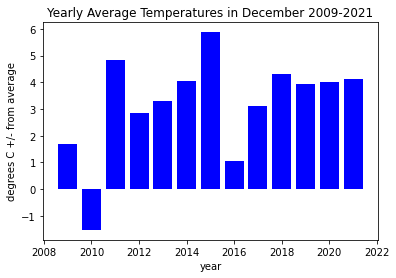

In [27]:
# display average temperature in December between 2009 and 2021
df_avgTempDec = df_avgTemp[(df_avgTemp.month == 12)]
plt.title("Yearly Average Temperatures in December 2009-2021")
plt.xlabel("year")
plt.ylabel("degrees C +/- from average")
plt.bar(df_avgTempDec['year'], df_avgTempDec['TT_TU'], color="blue")
plt.show()
# even though there are certain outliers in 2010 and 2016, the average temperature in December is rising with a maximum of nearly 6 degrees in average in 2015

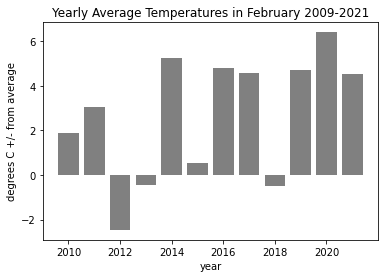

In [28]:
# display average temperature in February between 2009 and 2021
df_avgTempFeb = df_avgTemp[(df_avgTemp.month == 2)]
plt.title("Yearly Average Temperatures in February 2009-2021")
plt.xlabel("year")
plt.ylabel("degrees C +/- from average")
plt.bar(df_avgTempFeb['year'], df_avgTempFeb['TT_TU'], color="grey")
plt.show()
# except of years 2012,2013,2015 and 2018, there is a temperature rise to nearly 5 degrees in average for February

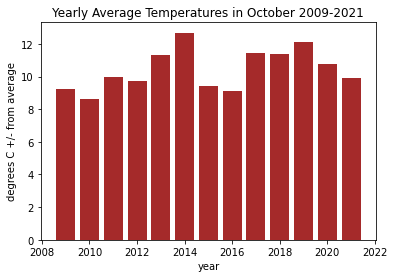

In [29]:
# display average temperature in February between 2009 and 2021
df_avgTempOct = df_avgTemp[(df_avgTemp.month == 10)]
plt.title("Yearly Average Temperatures in October 2009-2021")
plt.xlabel("year")
plt.ylabel("degrees C +/- from average")
plt.bar(df_avgTempOct['year'], df_avgTempOct['TT_TU'], color="brown")
plt.show()

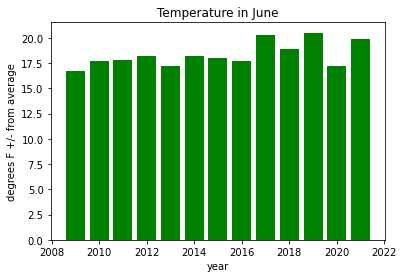

In [30]:
# display average temperature in June between 2009 and 2001
df_avgTempJun = df_avgTemp[(df_avgTemp.month == 6)]
plt.title("Temperature in June")
plt.xlabel("year")
plt.ylabel("degrees F +/- from average")
plt.bar(df_avgTempJun['year'], df_avgTempJun['TT_TU'], color='green')
plt.show()
# increase in temperature can be identified

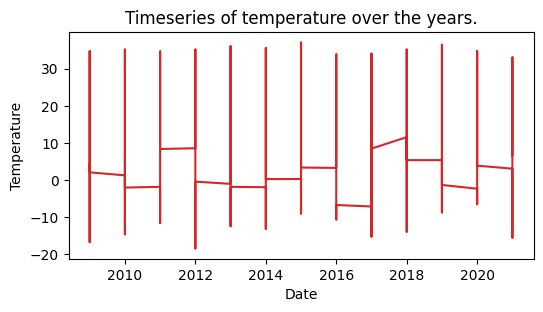

In [31]:
# plotting time series to check if a temperature change can be better displayed as in bar plots above
def plot_df(df, x, y, title="Temp", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(6,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_new, df_new['year'], df_new['TT_TU'], title='Timeseries of temperature over the years.')   